In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

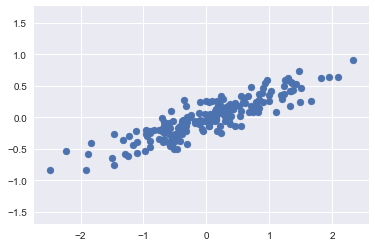

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2) , rng.randn(2,200)).T
plt.scatter(X[:,0] , X[:,1])
plt.axis('equal');

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
print (pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [8]:
print (pca.explained_variance_)

[0.7625315 0.0184779]


(-2.740770608255631, 2.581773841963696, -0.9503241913662932, 1.022119864077601)

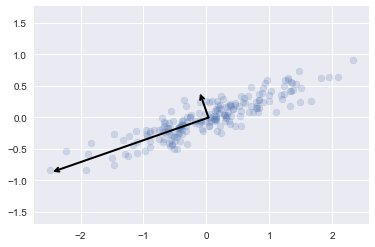

In [9]:
def draw_vector(v0 , v1 , ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->' , linewidth=2 , shrinkA=0 , shrinkB=0)
    ax.annotate('' , v1 , v0 , arrowprops = arrowprops)
plt.scatter(X[:,0] , X[:,1] , alpha=0.2)
for length , vector in zip(pca.explained_variance_ , pca.components_):
    v = vector *3 * np.sqrt(length)
    draw_vector(pca.mean_ , pca.mean_ + v)
plt.axis('equal')

In [10]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print ("original shape:  " , X.shape)
print ("transformed shape:  " , X_pca.shape)

original shape:   (200, 2)
transformed shape:   (200, 1)


(-2.78030489102931, 2.670533706929767, -1.0014180896959415, 1.0245529068552033)

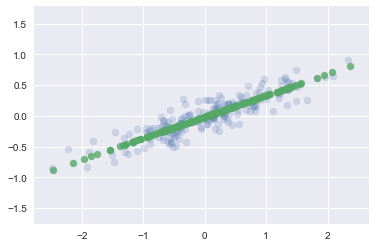

In [12]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0] , X[:,1] , alpha=0.2)
plt.scatter(X_new[:,0] , X_new[:,1] , alpha=0.8)
plt.axis('equal')

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [17]:
pca = PCA(2)
#project fro 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print ('原本的樣子' , digits.data.shape)
print ('投影完的樣子' , projected.shape)

原本的樣子 (1797, 64)
投影完的樣子 (1797, 2)


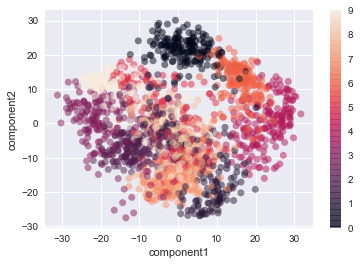

In [46]:
import matplotlib
import matplotlib.colors as col
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.scatter(projected[:,0] , projected[:,1] , c=digits.target , edgecolor='none', alpha=0.5)
plt.xlabel('component1')
plt.ylabel('component2')
plt.colorbar();

Text(0,0.5,'cumulative explained variance')

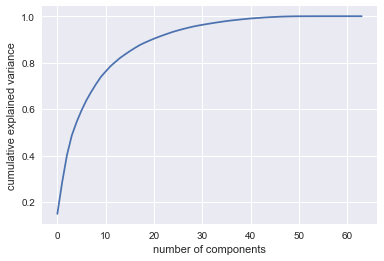

In [31]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

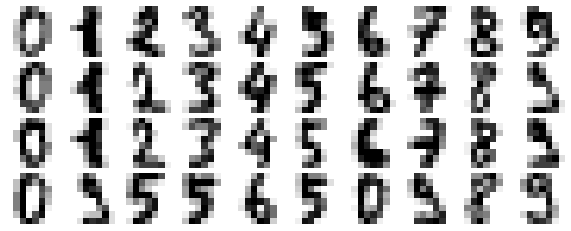

In [38]:
def plot_digits(data):
    fig , axes = plt.subplots(4,10 , figsize=(10,4),
                            subplot_kw={'xticks':[] , 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1 , wspace=0.1))
    for i , ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8) ,
                 cmap='binary' , interpolation='nearest' , 
                 clim=(0,16))
plot_digits(digits.data)

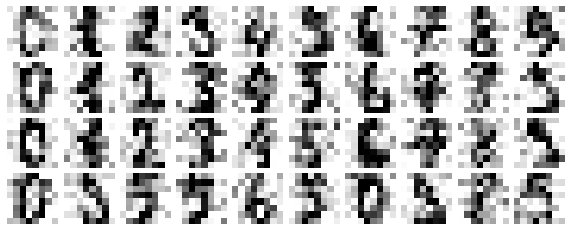

In [39]:
np.random.seed(42)
noisy=np.random.normal(digits.data , 4)
plot_digits(noisy)

In [55]:
pca = PCA(0.5).fit(noisy)
print ('需要' , pca.n_components_ , '主要成分才可以保留50%的變異量')

需要 12 主要成分才可以保留50%的變異量


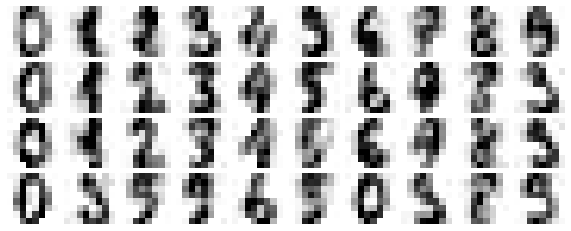

In [56]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)